In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt

In [2]:
DB = "chinook.db"

In [3]:
conn = sql.connect(DB)

In [4]:
def run_query(q):
    return pd.read_sql_query(q,conn)

In [5]:
q = """select * from sqlite_master where type = 'view'"""
run_query(q)

type                    name                tbl_name  rootpage  \
0  view  customer_gt_90_dollars  customer_gt_90_dollars         0   
1  view            customer_usa            customer_usa         0   
2  view             customer_US             customer_US         0   
3  view             customer_90             customer_90         0   
4  view          customer_ninty          customer_ninty         0   
5  view            customer_nin            customer_nin         0   

                                                 sql  
0  CREATE VIEW customer_gt_90_dollars As\r\n   Se...  
1  CREATE VIEW customer_usa As\n   Select * From ...  
2  CREATE VIEW customer_US as \n      select * fr...  
3  CREATE VIEW customer_90 as \n      select c.* ...  
4  CREATE VIEW customer_ninty as \n       select ...  
5  CREATE VIEW customer_nin as \n       select c....

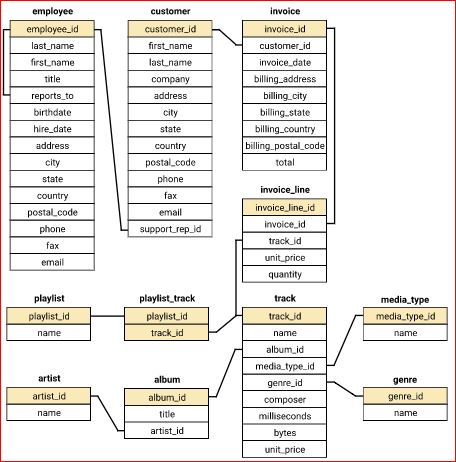

In [6]:
from IPython.display import Image
Image("1.jpeg")

In [7]:
q = """create view customer_nin as 
       select c.* from customer c
       inner join invoice inv
       on c.customer_id = inv.customer_id
       
       """
#run_query(q)


In [8]:
q = """select * from customer_nin limit 5"""
run_query(q)

customer_id first_name    last_name  \
0            1       Luís    Gonçalves   
1            3   François     Tremblay   
2            5  František  Wichterlová   
3            6     Helena         Holý   
4           13   Fernanda        Ramos   

                                            company  \
0  Embraer - Empresa Brasileira de Aeronáutica S.A.   
1                                              None   
2                                  JetBrains s.r.o.   
3                                              None   
4                                              None   

                           address                 city state         country  \
0  Av. Brigadeiro Faria Lima, 2170  São José dos Campos    SP          Brazil   
1                1498 rue Bélanger             Montréal    QC          Canada   
2                    Klanova 9/506               Prague  None  Czech Republic   
3                    Rilská 3174/6               Prague  None  Czech Republic   
4                     Qe 7 Bloco G             Brasília    DF          Brazil   

  postal_code               phone                 fax  \
0   12227-000  +55 (12) 3923-5555  +55 (12) 3923-5566   
1     H2G 1A7   +1 (514) 721-4711                None   
2       14700    +420 2 4172 5555    +420 2 4172 5555   
3       14300    +420 2 4177 0449                None   
4   71020-677  +55 (61) 3363-5547  +55 (61) 3363-7855   

                      email  support_rep_id  
0      luisg@embraer.com.br               3  
1       ftremblay@gmail.com               3  
2  frantisekw@jetbrains.com               4  
3           hholy@gmail.com               5  
4  fernadaramos4@uol.com.br               4

In [33]:
q = """create view total_90 as
       select c.* , inv.total from customer c
       inner join invoice inv
       on c.customer_id = inv.customer_id
       
       where (select inv.total from invoice inv) > 10;
       """
#run_query(q)


In [34]:
q = """select * from total_90"""
run_query(q)

customer_id first_name     last_name  \
0             1       Luís     Gonçalves   
1             2     Leonie        Köhler   
2             3   François      Tremblay   
3             4      Bjørn        Hansen   
4             5  František   Wichterlová   
5             6     Helena          Holý   
6             7     Astrid        Gruber   
7             8       Daan       Peeters   
8             9       Kara       Nielsen   
9            10    Eduardo       Martins   
10           11  Alexandre         Rocha   
11           12    Roberto       Almeida   
12           13   Fernanda         Ramos   
13           14       Mark       Philips   
14           15   Jennifer      Peterson   
15           16      Frank        Harris   
16           17       Jack         Smith   
17           18   Michelle        Brooks   
18           19        Tim         Goyer   
19           20        Dan        Miller   
20           21      Kathy         Chase   
21           22    Heather       Leacock   
22           23       John        Gordon   
23           24      Frank       Ralston   
24           25     Victor       Stevens   
25           26    Richard    Cunningham   
26           27    Patrick          Gray   
27           28      Julia       Barnett   
28           29     Robert         Brown   
29           30     Edward       Francis   
30           31     Martha          Silk   
31           32      Aaron      Mitchell   
32           33      Ellie      Sullivan   
33           34       João     Fernandes   
34           35   Madalena       Sampaio   
35           36     Hannah     Schneider   
36           37       Fynn    Zimmermann   
37           38     Niklas      Schröder   
38           39    Camille       Bernard   
39           40  Dominique      Lefebvre   
40           41       Marc        Dubois   
41           42      Wyatt        Girard   
42           43   Isabelle       Mercier   
43           44      Terhi    Hämäläinen   
44           45   Ladislav        Kovács   
45           46       Hugh      O'Reilly   
46           47      Lucas       Mancini   
47           48   Johannes  Van der Berg   
48           49  Stanisław        Wójcik   
49           50    Enrique         Muñoz   
50           51     Joakim     Johansson   
51           52       Emma         Jones   
52           53       Phil        Hughes   
53           54      Steve        Murray   
54           55       Mark        Taylor   
55           56      Diego     Gutiérrez   
56           57       Luis         Rojas   
57           58      Manoj        Pareek   
58           59       Puja    Srivastava   

                                             company  \
0   Embraer - Empresa Brasileira de Aeronáutica S.A.   
1                                               None   
2                                               None   
3                                               None   
4                                   JetBrains s.r.o.   
5                                               None   
6                                               None   
7                                               None   
8                                               None   
9                                   Woodstock Discos   
10                              Banco do Brasil S.A.   
11                                            Riotur   
12                                              None   
13                                             Telus   
14                                     Rogers Canada   
15                                       Google Inc.   
16                             Microsoft Corporation   
17                                              None   
18                                        Apple Inc.   
19                                              None   
20                                              None   
21                                              None   
22                                              None   
23                 

In [10]:
q = """With playlist_info as (
       Select pl.playlist_id, 
       pl.name, t.track_id,
       (t.milliseconds/1000) length_sec
       from playlist pl
       left join playlist_track plt
       on plt.playlist_id = pl.playlist_id
       left join track t
       on t.track_id = plt.track_id)
       
       select playlist_id , name,
       count(track_id) track_id,
       sum(length_sec) length
       from playlist_info 
       group by 1"""
run_query(q)

playlist_id                        name  track_id    length
0             1                       Music      3290  876049.0
1             2                      Movies         0       NaN
2             3                    TV Shows       213  500987.0
3             4                  Audiobooks         0       NaN
4             5                  90’s Music      1477  397970.0
5             6                  Audiobooks         0       NaN
6             7                      Movies         0       NaN
7             8                       Music      3290  876049.0
8             9                Music Videos         1     294.0
9            10                    TV Shows       213  500987.0
10           11             Brazilian Music        39    9464.0
11           12                   Classical        75   21736.0
12           13   Classical 101 - Deep Cuts        25    6742.0
13           14  Classical 101 - Next Steps        25    7565.0
14           15  Classical 101 - The Basics        25    7429.0
15           16                      Grunge        15    4114.0
16           17         Heavy Metal Classic        26    8189.0
17           18                 On-The-Go 1         1     197.0

In [11]:
q = """create view customer_US as 
      select * from customer 
      WHERE COUNTRY = "USA";
       """
#run_query(q)      ek dfa error lana ha phr chlega

In [12]:
q = """ select * from customer_US 
        limit 5"""
run_query(q)

customer_id first_name last_name                company  \
0           16      Frank    Harris            Google Inc.   
1           17       Jack     Smith  Microsoft Corporation   
2           18   Michelle    Brooks                   None   
3           19        Tim     Goyer             Apple Inc.   
4           20        Dan    Miller                   None   

                     address           city state country postal_code  \
0  1600 Amphitheatre Parkway  Mountain View    CA     USA  94043-1351   
1            1 Microsoft Way        Redmond    WA     USA  98052-8300   
2               627 Broadway       New York    NY     USA  10012-2612   
3            1 Infinite Loop      Cupertino    CA     USA       95014   
4       541 Del Medio Avenue  Mountain View    CA     USA   94040-111   

               phone                fax                    email  \
0  +1 (650) 253-0000  +1 (650) 253-0000       fharris@google.com   
1  +1 (425) 882-8080  +1 (425) 882-8081  jacksmith@microsoft.com   
2  +1 (212) 221-3546  +1 (212) 221-4679        michelleb@aol.com   
3  +1 (408) 996-1010  +1 (408) 996-1011         tgoyer@apple.com   
4  +1 (650) 644-3358               None      dmiller@comcast.com   

   support_rep_id  
0               4  
1               5  
2               3  
3               3  
4               4

In [26]:
 #no.col,dtype same ho jb union kro tau
q = """create view customer_90
       Union
       select * from customer_US"""
#run_query(q)

In [27]:
q = """ select * from customer_90"""
run_query(q)

customer_id first_name     last_name  \
0             1       Luís     Gonçalves   
1             2     Leonie        Köhler   
2             3   François      Tremblay   
3             4      Bjørn        Hansen   
4             5  František   Wichterlová   
5             6     Helena          Holý   
6             7     Astrid        Gruber   
7             8       Daan       Peeters   
8             9       Kara       Nielsen   
9            10    Eduardo       Martins   
10           11  Alexandre         Rocha   
11           12    Roberto       Almeida   
12           13   Fernanda         Ramos   
13           14       Mark       Philips   
14           15   Jennifer      Peterson   
15           16      Frank        Harris   
16           17       Jack         Smith   
17           18   Michelle        Brooks   
18           19        Tim         Goyer   
19           20        Dan        Miller   
20           21      Kathy         Chase   
21           22    Heather       Leacock   
22           23       John        Gordon   
23           24      Frank       Ralston   
24           25     Victor       Stevens   
25           26    Richard    Cunningham   
26           27    Patrick          Gray   
27           28      Julia       Barnett   
28           29     Robert         Brown   
29           30     Edward       Francis   
30           31     Martha          Silk   
31           32      Aaron      Mitchell   
32           33      Ellie      Sullivan   
33           34       João     Fernandes   
34           35   Madalena       Sampaio   
35           36     Hannah     Schneider   
36           37       Fynn    Zimmermann   
37           38     Niklas      Schröder   
38           39    Camille       Bernard   
39           40  Dominique      Lefebvre   
40           41       Marc        Dubois   
41           42      Wyatt        Girard   
42           43   Isabelle       Mercier   
43           44      Terhi    Hämäläinen   
44           45   Ladislav        Kovács   
45           46       Hugh      O'Reilly   
46           47      Lucas       Mancini   
47           48   Johannes  Van der Berg   
48           49  Stanisław        Wójcik   
49           50    Enrique         Muñoz   
50           51     Joakim     Johansson   
51           52       Emma         Jones   
52           53       Phil        Hughes   
53           54      Steve        Murray   
54           55       Mark        Taylor   
55           56      Diego     Gutiérrez   
56           57       Luis         Rojas   
57           58      Manoj        Pareek   
58           59       Puja    Srivastava   

                                             company  \
0   Embraer - Empresa Brasileira de Aeronáutica S.A.   
1                                               None   
2                                               None   
3                                               None   
4                                   JetBrains s.r.o.   
5                                               None   
6                                               None   
7                                               None   
8                                               None   
9                                   Woodstock Discos   
10                              Banco do Brasil S.A.   
11                                            Riotur   
12                                              None   
13                                             Telus   
14                                     Rogers Canada   
15                                       Google Inc.   
16                             Microsoft Corporation   
17                                              None   
18                                        Apple Inc.   
19                                              None   
20                                              None   
21                                              None   
22                                              None   
23                 

In [35]:
 #intersect ki jaga except b use krskte hain
q = """select * from customer_90
       intersect                          
       select * from customer_US"""
run_query(q)

customer_id first_name   last_name                company  \
0            16      Frank      Harris            Google Inc.   
1            17       Jack       Smith  Microsoft Corporation   
2            18   Michelle      Brooks                   None   
3            19        Tim       Goyer             Apple Inc.   
4            20        Dan      Miller                   None   
5            21      Kathy       Chase                   None   
6            22    Heather     Leacock                   None   
7            23       John      Gordon                   None   
8            24      Frank     Ralston                   None   
9            25     Victor     Stevens                   None   
10           26    Richard  Cunningham                   None   
11           27    Patrick        Gray                   None   
12           28      Julia     Barnett                   None   

                      address            city state country postal_code  \
0   1600 Amphitheatre Parkway   Mountain View    CA     USA  94043-1351   
1             1 Microsoft Way         Redmond    WA     USA  98052-8300   
2                627 Broadway        New York    NY     USA  10012-2612   
3             1 Infinite Loop       Cupertino    CA     USA       95014   
4        541 Del Medio Avenue   Mountain View    CA     USA   94040-111   
5            801 W 4th Street            Reno    NV     USA       89503   
6            120 S Orange Ave         Orlando    FL     USA       32801   
7             69 Salem Street          Boston    MA     USA        2113   
8       162 E Superior Street         Chicago    IL     USA       60611   
9       319 N. Frances Street         Madison    WI     USA       53703   
10        2211 W Berry Street      Fort Worth    TX     USA       76110   
11            1033 N Park Ave          Tucson    AZ     USA       85719   
12                302 S 700 E  Salt Lake City    UT     USA       84102   

                phone                fax                     email  \
0   +1 (650) 253-0000  +1 (650) 253-0000        fharris@google.com   
1   +1 (425) 882-8080  +1 (425) 882-8081   jacksmith@microsoft.com   
2   +1 (212) 221-3546  +1 (212) 221-4679         michelleb@aol.com   
3   +1 (408) 996-1010  +1 (408) 996-1011          tgoyer@apple.com   
4   +1 (650) 644-3358               None       dmiller@comcast.com   
5   +1 (775) 223-7665               None       kachase@hotmail.com   
6   +1 (407) 999-7788               None        hleacock@gmail.com   
7   +1 (617) 522-1333               None    johngordon22@yahoo.com   
8   +1 (312) 332-3232               None        fralston@gmail.com   
9   +1 (608) 257-0597               None        vstevens@yahoo.com   
10  +1 (817) 924-7272               None  ricunningham@hotmail.com   
11  +1 (520) 622-4200               None      patrick.gray@aol.com   
12  +1 (801) 531-7272               None       jubarnett@gmail.com   

    support_rep_id  
0                4  
1                5  
2                3  
3                3  
4                4  
5                5  
6                4  
7                4  
8                3  
9                5  
10               4  
11               4  
12               5

In [36]:
q = """with customer_us_90 as (select * from customer_90
       intersect                          
       select * from customer_US)
       select e.first_name || '' || e.last_name name,
       count(c.customer_id) from employee e
       left join customer_us_90 c
       on c.support_rep_id = e.employee_id
       where e.title = "Sales Support Agent"
       group by 1"""
run_query(q)

name  count(c.customer_id)
0   JanePeacock                     3
1  MargaretPark                     6
2  SteveJohnson                     4

In [37]:
# employee ka name chie , title chie 
q = """with customers as (select c.country,
c.first_name || '' || c.last_name customer_name,
sum(inv.total) total_spend
from customer c
left join  invoice inv
on c.customer_id = inv.customer_id
group by 2)

select country, customer_name , max(total_spend) amount
from customers
group by 1
order by 1"""
run_query(q)

country         customer_name  amount
0        Argentina        DiegoGutiérrez   39.60
1        Australia            MarkTaylor   81.18
2          Austria          AstridGruber   69.30
3          Belgium           DaanPeeters   60.39
4           Brazil         LuísGonçalves  108.90
5           Canada      FrançoisTremblay   99.99
6            Chile             LuisRojas   97.02
7   Czech Republic  FrantišekWichterlová  144.54
8          Denmark           KaraNielsen   37.62
9          Finland       TerhiHämäläinen   79.20
10          France           WyattGirard   99.99
11         Germany        FynnZimmermann   94.05
12         Hungary        LadislavKovács   78.21
13           India           ManojPareek  111.87
14         Ireland          HughO'Reilly  114.84
15           Italy          LucasMancini   50.49
16     Netherlands  JohannesVan der Berg   65.34
17          Norway           BjørnHansen   72.27
18          Poland       StanisławWójcik   76.23
19        Portugal         JoãoFernandes  102.96
20           Spain          EnriqueMuñoz   98.01
21          Sweden       JoakimJohansson   75.24
22             USA             JackSmith   98.01
23  United Kingdom            PhilHughes   98.01